In [1]:
import neat
import os
import evogym.envs
from evogym import is_connected, has_actuator, get_full_connectivity, hashable
import numpy as np
from pathos.multiprocessing import ProcessPool
import errno
import dill
import sys
sys.path.append('../')

import neat
from hyperneat.new_hyperNEAT import create_phenotype_network
from hyperneat.substrate import Substrate
from hyperneat.visualize import draw_net

import itertools as it
import time
import imageio

import single_genome_hyperNEAT_2 as hyper
from matplotlib import pyplot as plt


In [2]:
def get_robot(genome, params, neat_config):
    cppn = neat.nn.FeedForwardNetwork.create(genome, neat_config)

    design_substrate = hyper.morph_substrate(params)
    design_net = hyper.create_phenotype_network(cppn, design_substrate)

    robot = hyper.generate_robot(design_net, params["robot_size"])
    if not hyper.eval_genome_constraint(robot):
        return robot, None
    connections = get_full_connectivity(robot)
    env = evogym.envs.gym.make(params["env"], body=robot, connections=connections)
    img = env.render(mode='img')
    env.close()
    return robot, img

In [9]:
ENV = "ObstacleTraverser-v1" # env_names = ["CaveCrawler-v0", "UpStepper-v0", "ObstacleTraverser-v0"]
STEPS = 500
ROBOT_SIZE = 5
POP = 64

params = {"robot_size": ROBOT_SIZE, "env": ENV, "steps": STEPS, "pop_size": POP}

neat_config = neat.config.Config(
    neat.genome.DefaultGenome, 
    neat.reproduction.DefaultReproduction, 
    neat.species.DefaultSpeciesSet, 
    neat.stagnation.DefaultStagnation, 
    "../configs/hyperNEAT_config"
)


In [10]:
directory = "results/temp/"
file = "run_2_pop.pkl"

with open(f"../{directory}{file}", "rb") as file:
    pop = dill.load(file)
    
champion = pop.best_genome

In [11]:
# hyper.single_genome_fit(champion, params, neat_config, True)
params["cpu"]= 4
genomes = [(g.key, g) for g in pop.population.values()]
# hyper.fit_func(genomes, neat_config, params)

Specie  19


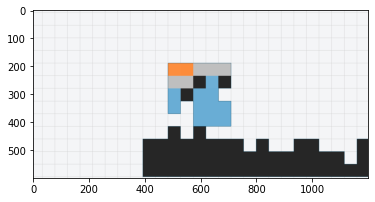

Specie  13


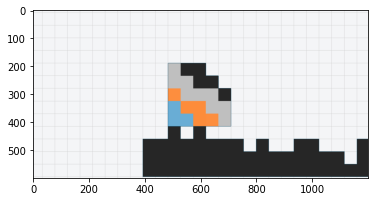

Specie  7


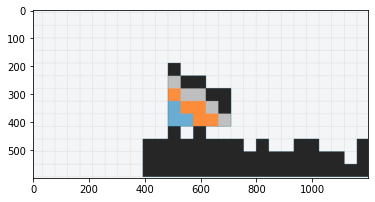

Specie  8


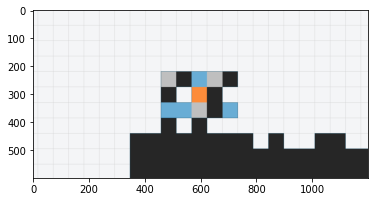

Specie  15


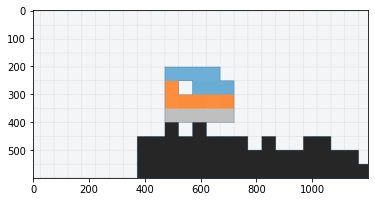

Specie  12


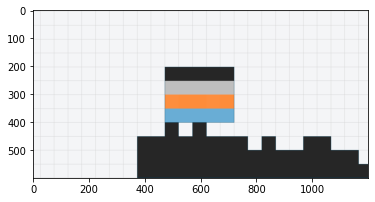

Specie  3


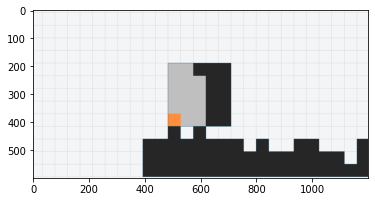

Specie  18


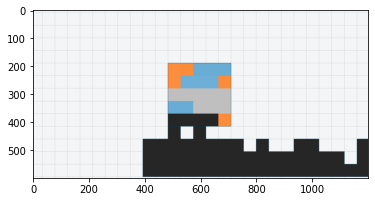

Specie  16


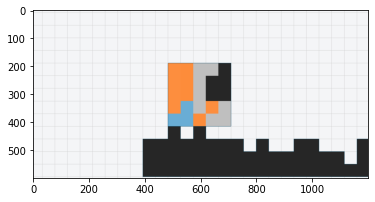

Specie  17


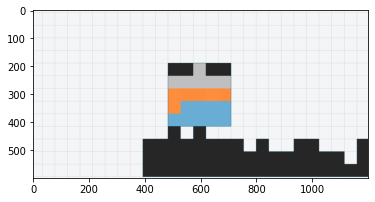

Specie  5


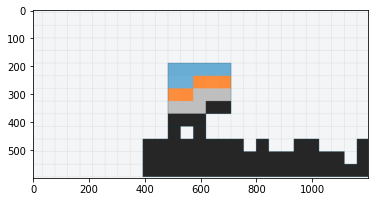

Specie  4


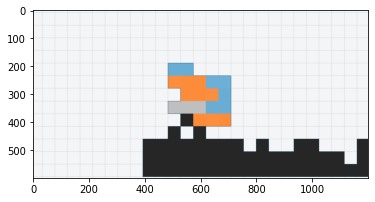

Specie  10


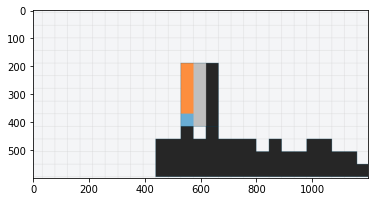

Specie  11


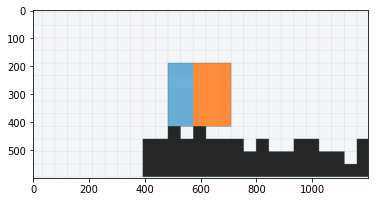

Specie  6


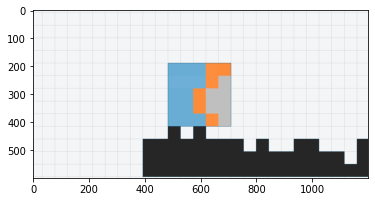

Specie  2


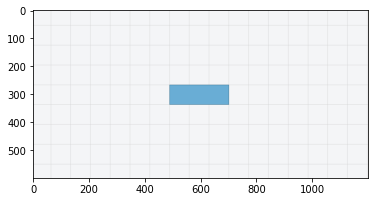

Specie  9


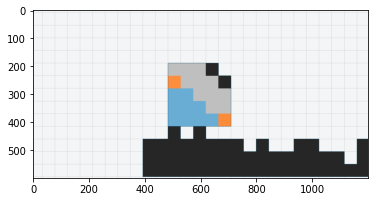

Specie  14


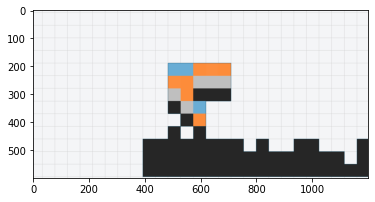

Specie  1


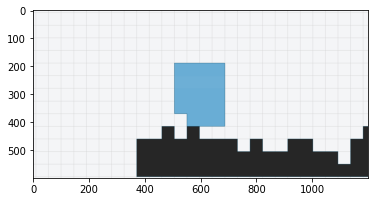

Specie  20
Specie  21
Specie  22


In [12]:
for k, v in pop.species.species.items():
    print("Specie ", k)
    for g in v.members.values():
        if g.fitness != None:
            # hyper.single_genome_fit(
            #     g, 
            #     params, 
            #     neat_config, 
            #     True
            # )
            r, img = get_robot(g, params, neat_config)
            if img is not None:
                plt.imshow(img)
                plt.show()


In [ ]:
hyper.single_genome_fit(champion, params, neat_config, True)